# Part I - (Dataset Exploration Title)
## by (Amulya Kandukuri)

## Introduction
> This is a fordgobike-tripdata.csv dataset consisting of 16 columns describing the trip start, end times along with duration, stations,time when the trip started and ended. It also describes about customers and subscribers.

This covers bike trip data in February 2019


## Preliminary Wrangling


In [1]:
#update seaborn version 
!pip install seaborn==0.9.0

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading dataset to a dataframe
bike_data = pd.read_csv('fordgobike-tripdata.csv')
bike_data.info()
print('shape:',bike_data.shape)
bike_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
shape: (183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#overview of data
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
#checking for duplicates
bike_data.duplicated().sum()

0

In [6]:
#checking for Null values in columns
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

> The dataset consists of 183412 rows and 16 columns : ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip']. 

> 'start_time' and 'end_time' should be datetime data type rather than object.

> 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name' have 197 missing values in each column. 

> 'member_birth_year', 'member_gender' have 8265 missing values in each column

### What is/are the main feature(s) of interest in your dataset?

> Main features of my interest are:
1. Which station has most trips started and most trips ended?
2. What is the longest duration and the average durations of trips taken from and to a station?
3. Who took the most trips subscriber or customer?
4. What is the distribution of genders?
5. When does the most trips happened: morning , afternoon, evening, night? And which weekday?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features like gathering information about stations and their number of trips will answer the interest in station with most trips stated and ended. Gathering information about time of day like morning, afternoon, evening, night from 'start_time' and 'end_time' columns shows us what is the busiest time of the day. Gathering information about genders with columns 'member_birth_year', 'member_gender' and even if they are subscribers or customers shows us information about who took the most trips. These features in dataset will help and support my investigation of my interest. 

In [7]:
#making a copy of dataset
bike_data_original = bike_data.copy()
bike_data_original.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [8]:
# drop irrelevant columns
bike_data.drop(['end_time', 'start_station_id','start_station_latitude', 
                'start_station_longitude', 'end_station_id',
                'end_station_latitude', 'end_station_longitude'], axis = 1, inplace = True)
bike_data.dropna(axis = 0, inplace=True)
bike_data.head()

,duration_sec,start_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [9]:
#making 'start_time' column as datetime datatype
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 13.3+ MB


In [10]:
#defining morning, afternoon, evening and night times of day
bike_data['start_hour'] = bike_data['start_time'].dt.hour
bike_data['time_day'] = 'Morning'
bike_data['time_day'][(bike_data['start_hour'] >= 12) & (bike_data['start_hour'] < 18)] = 'Afternoon'
bike_data['time_day'][(bike_data['start_hour'] >= 18) & (bike_data['start_hour'] < 24)] = 'Evening'
bike_data['time_day'][(bike_data['start_hour'] >= 0) & (bike_data['start_hour'] <= 6)] = 'Night'

# defining day of week
bike_data['day_of_week'] = bike_data['start_time'].dt.weekday_name
bike_data.head()

,duration_sec,start_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,time_day,day_of_week
0,52185,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,17,Afternoon,Thursday
2,61854,2019-02-28 12:13:13.218,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,12,Afternoon,Thursday
3,36490,2019-02-28 17:54:26.010,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,17,Afternoon,Thursday
4,1585,2019-02-28 23:54:18.549,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,23,Evening,Thursday
5,1793,2019-02-28 23:49:58.632,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,23,Evening,Thursday


## Univariate Exploration

> In this section, i start by investigating about top 20 stations for starting trip and ending trip. There after, duration of trips with respect to number of trips. The user types along with gender distribution is visualized with number of trips. Also, the number of trips taken in each day of week and also each hour during day is determined. The distribution of user ages along with their birth years are also shown in this part of exploration.

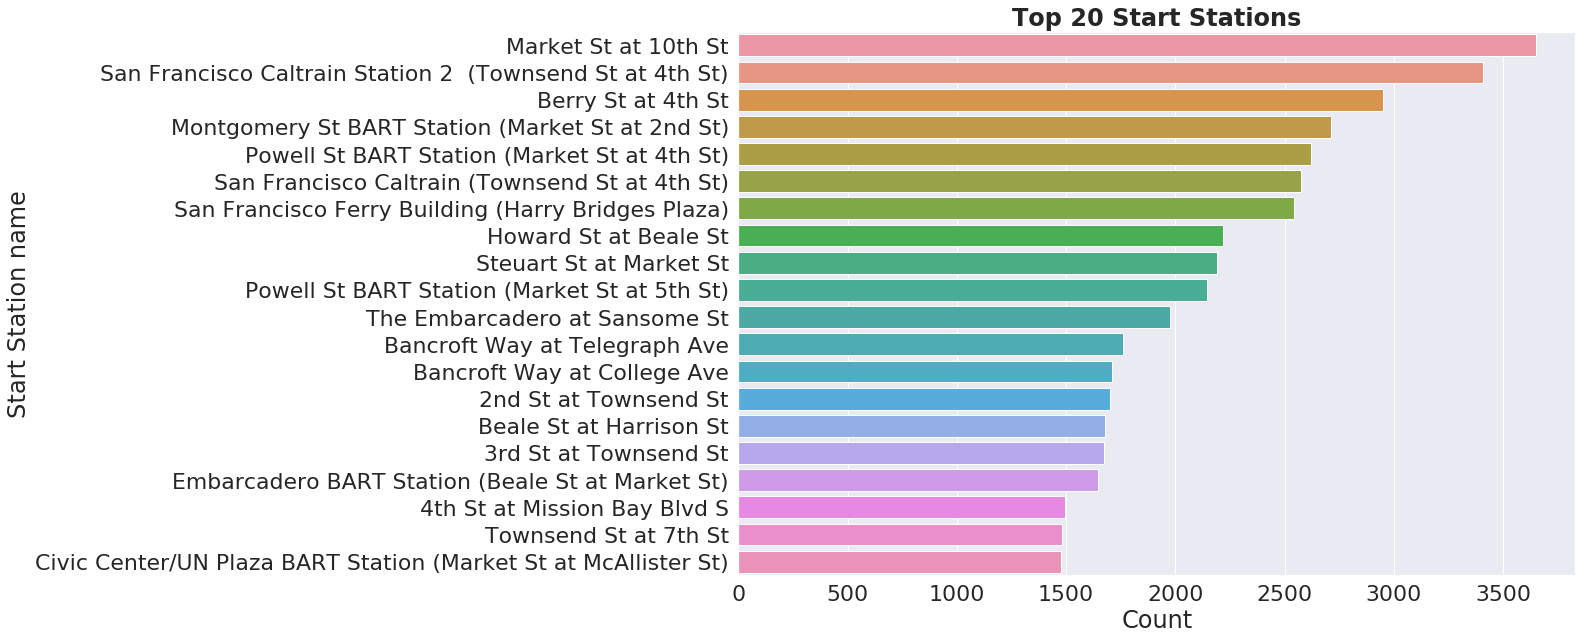

In [11]:
# get number of trips started from each station for top 20 stations
temp_data = bike_data['start_station_name'].value_counts().head(20)

#plotting top 20 stations with most trips
plt.figure(figsize=(15,10))
sb.set(font_scale=2)
sb.barplot(y=temp_data.index.values, x=temp_data)
plt.ylabel('Start Station name')
plt.xlabel('Count')
plt.title('Top 20 Start Stations',fontweight='bold');


The above bar chart shows top 20 stations where the bike trip have started and number of times trip started from each station. The top most stations include :
Market St at 10th St, San Francisco Caltrain Station 2  (Townsend St at 4th St), Berry St at 4th St, Montgomery St BART Station (Market St at 2nd St), Powell St BART Station (Market St at 4th St), San Francisco Caltrain (Townsend St at 4th St), San Francisco Ferry Building (Harry Bridges Plaza), Howard St at Beale St, Steuart St at Market St, Powell St BART Station (Market St at 5th St), The Embarcadero at Sansome St, Bancroft Way at Telegraph Ave, Bancroft Way at College Ave, 2nd St at Townsend St, Beale St at Harrison St, 3rd St at Townsend St, Embarcadero BART Station (Beale St at Market St), 4th St at Mission Bay Blvd S,Townsend St at 7th St.
I have depicted this using a bar chart with station name on y axis and number of times on x-axis

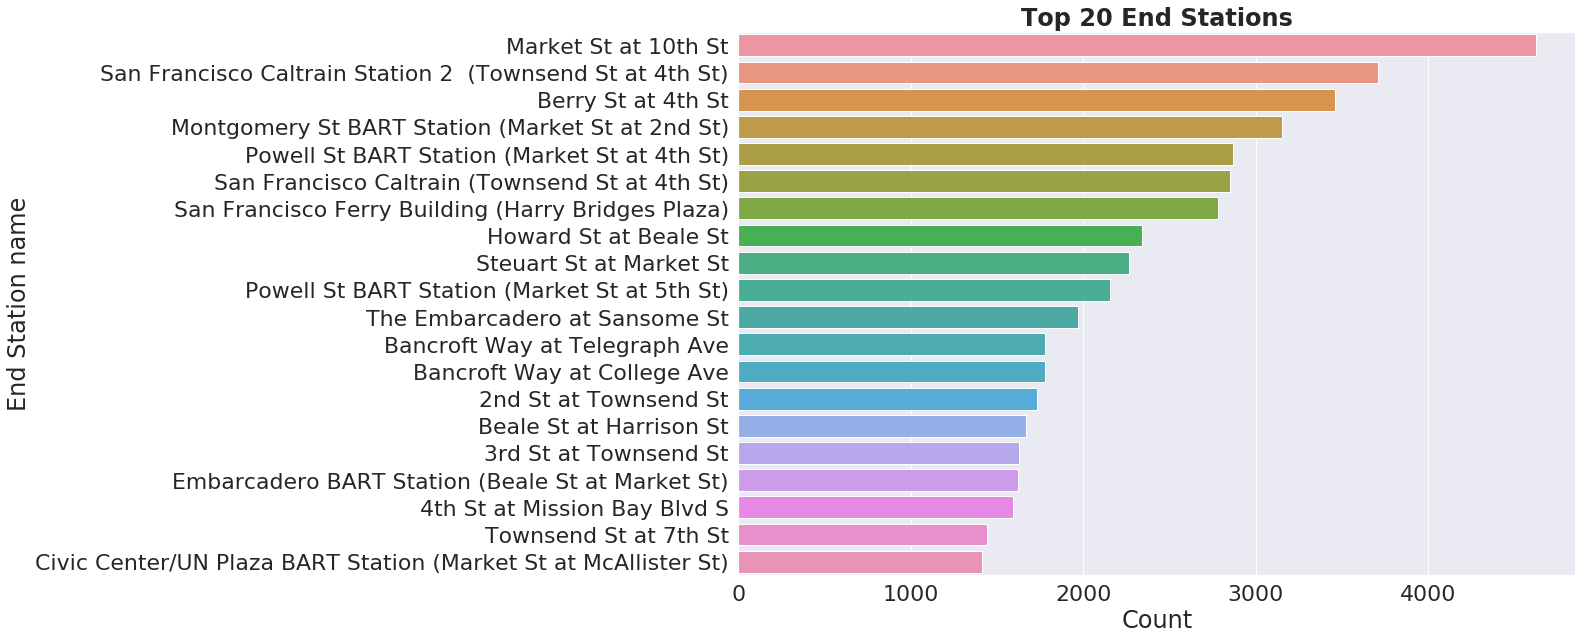

In [12]:
#get number of trips ended at each station
temp_data1 = bike_data['end_station_name'].value_counts().head(20)
plt.figure(figsize=(15,10))
sb.set(font_scale=2)
sb.barplot(y=temp_data.index.values, x=temp_data1)
plt.ylabel('End Station name')
plt.xlabel('Count')
plt.title('Top 20 End Stations',fontweight='bold');

The above bar chart shows top 20 stations where the bike trip have ended and number of times trip ended at each station. The top most stations include :
San Francisco Caltrain Station 2  (Townsend St at 4th St),Market St at 10th St,Montgomery St BART Station (Market St at 2nd St),San Francisco Ferry Building (Harry Bridges Plaza),San Francisco Caltrain (Townsend St at 4th St),Powell St BART Station (Market St at 4th St),Berry St at 4th St,The Embarcadero at Sansome St,Steuart St at Market St,Powell St BART Station (Market St at 5th St),Howard St at Beale St,Beale St at Harrison St, Bancroft Way at Telegraph Ave,Civic Center/UN Plaza BART Station (Market St at McAllister St), 2nd St at Townsend St, 3rd St at Townsend St, Embarcadero BART Station (Beale St at Market St), 4th St at Mission Bay Blvd S,Townsend St at 7th St, The Embarcadero at Steuart St.
I have depicted this using a bar chart with station name on y axis and number of times on x axis.

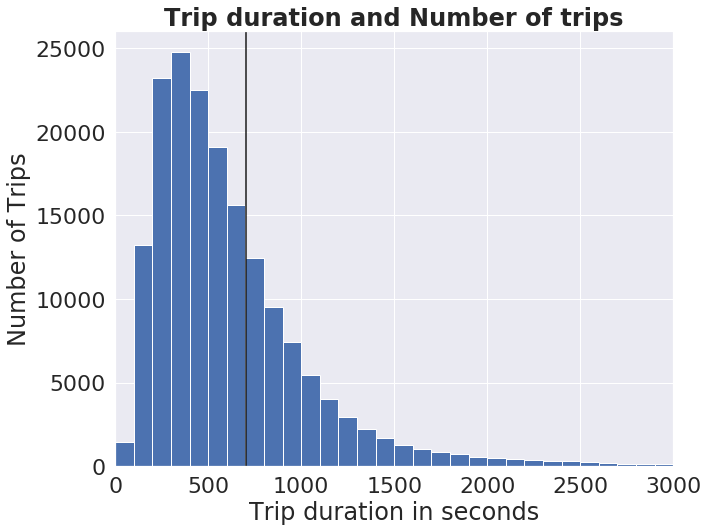

In [13]:
# number of trips
bins = np.arange(0,bike_data['duration_sec'].max()+100,100)
plt.figure(figsize=(10,8))
plt.hist(data = bike_data, x ='duration_sec',bins = bins)
#average duration of trip
plt.axvline(bike_data['duration_sec'].mean(), color = 'k')
plt.xlim(0,3000)
plt.xlabel('Trip duration in seconds')
plt.ylabel('Number of Trips')
plt.title('Trip duration and Number of trips',fontweight='bold');

I have depicted a. histogram that shows trip duration in seconds on x axis and number of trips on y axis.The above histogram shows distribution of Trip duration in number of trips. The binning size is set as 100 and the limitations of x axis is set to 3000 seconds. The histogram shows the line at average trip duration at 726 seconds. The histogram is right-skewed with most number of trips below 726 seconds.

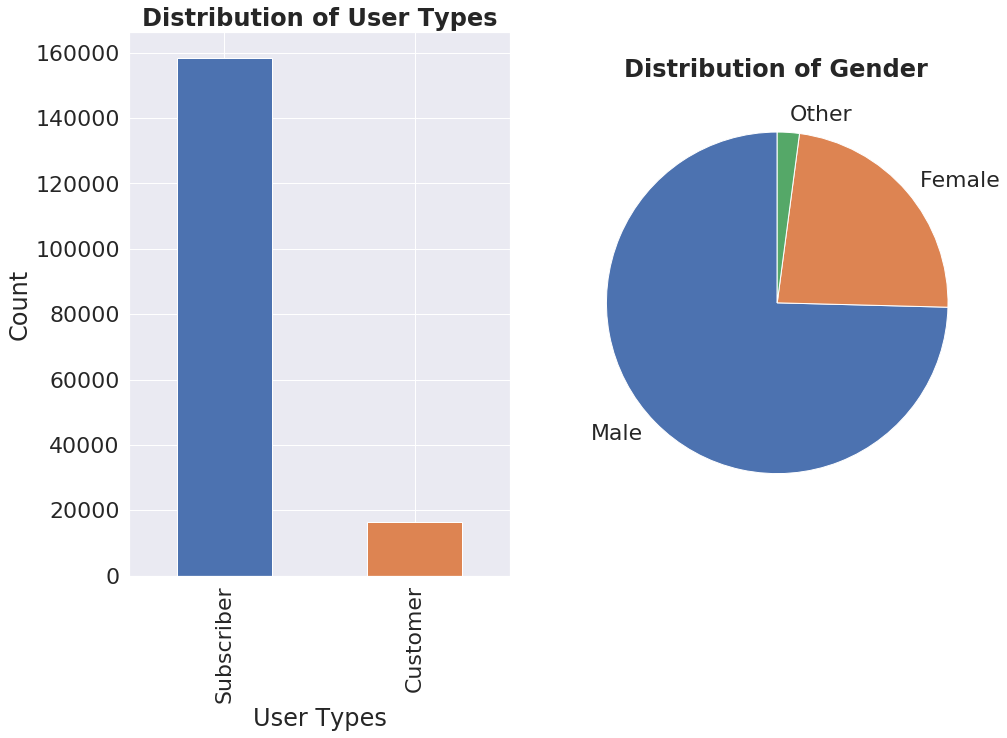

In [14]:
#distribution of number of subscribers and number of customers
user_counts = bike_data['user_type'].value_counts()
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(15,10))
user_counts.plot(ax = ax0, kind='bar')
ax0.set_title('Distribution of User Types',fontweight='bold')
ax0.set_xlabel('User Types')
ax0.set_ylabel('Count');

#distribution of genders
gender_counts = bike_data['member_gender'].value_counts()
ax1.pie(gender_counts, labels = gender_counts.index,startangle = 90, counterclock = True)
ax1.axis('square')
ax1.set_title('Distribution of Gender',fontweight='bold', y= 1.08);

In the above plot, there is a bar chart and pie chart. Bar chart has user types on x axis and number of users on y axis. Bar chart shows the number of suscribers and customers. Here, there are most number of trips occurred due to subscribers which are approximately 160000. The number of customers are below 20000. In the pie chart, the distribution of gender types in users of ford bike trip is shown. The most are Males along with some Females. There is minimal amount of other gender in the users.

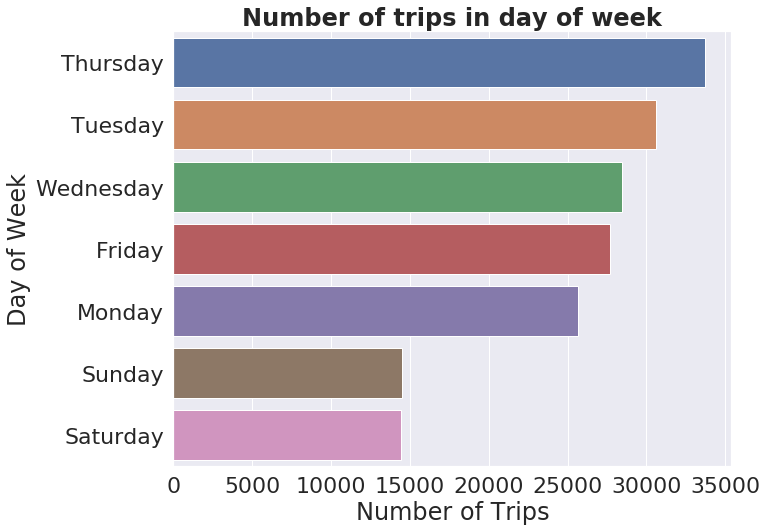

In [15]:
# trips during week
plt.figure(figsize=(10,8))
week_count = bike_data['day_of_week'].value_counts()
sb.barplot(y = week_count.index, x = week_count)
plt.xlabel('Number of Trips')
plt.ylabel('Day of Week')
plt.title('Number of trips in day of week',fontweight='bold');

I have depicted the bar chart to show number of trips on x axis and the day of week on y axis. The above bar graph shows Number of trips occurred in day of week. The most number of trips occurred on Thursday and least number on Saturday. The order of number of trips occurred on each day ranking from the highest to the lowest are: Thursday, Tuesday, Wednesday, Friday, Monday, Sunday and Saturday. 

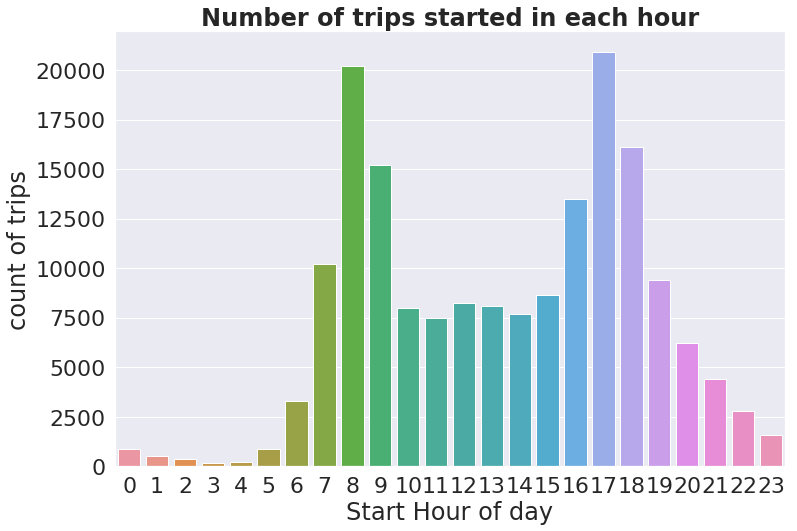

In [16]:
# Number of trips during each hour of day
plt.figure(figsize=(12,8))
hour_count = bike_data['start_hour'].value_counts()
sb.barplot(x=hour_count.index , y = hour_count)
plt.xlabel('Start Hour of day')
plt.ylabel('count of trips')
plt.title('Number of trips started in each hour',fontweight='bold');

I have used a bar chart to show the number of trips taken in each hour. The above bar graph shows start hour of trip on x axis and number of trips on y axis. There is a peak in number of trips taken at 17 th hour and 8th hour of day with more than 20000 times. And the next most trips are at 9th hour and 18th hour of day with more than 15000 times.

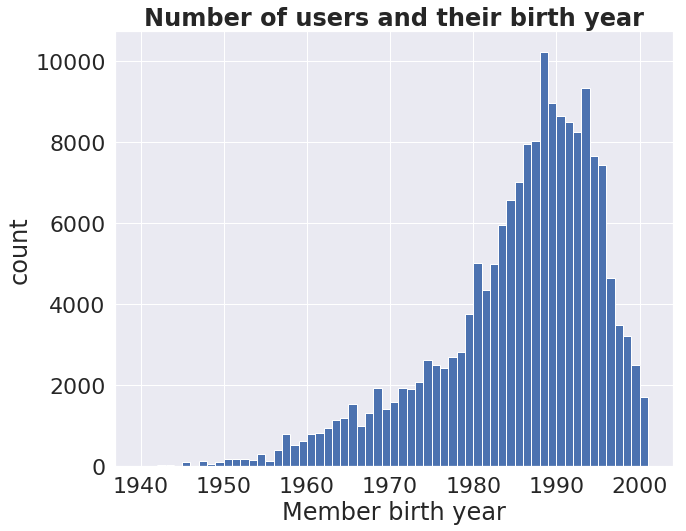

In [17]:
#number of users in an age group

plt.figure(figsize = (10,8))
bike_data['member_birth_year'].dropna()
bins1 = np.arange(1940, bike_data['member_birth_year'].max()+1, 1)
plt.hist(x = bike_data['member_birth_year'].dropna() , bins = bins1)
plt.xlabel('Member birth year')
plt.ylabel('count')
plt.title('Number of users and their birth year',fontweight='bold');

I have used an histogram to represent the distribution of birthyears of all users. The above histogram has the member birth year on x axis and the number of times it occurred in y axis. There are more members who has birthyear as 1987 with a count of more than 10000 members. The next most common birth year among members is 1992 with approximately 9000 members. 

In [18]:
bike_data.describe()

,duration_sec,bike_id,member_birth_year,start_hour
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,4482.587555,1984.803135,13.456165
std,1642.204905,1659.195937,10.118731,4.734282
min,61.000000,11.000000,1878.000000,0.000000
25%,323.000000,3799.000000,1980.000000,9.000000
50%,510.000000,4960.000000,1987.000000,14.000000
75%,789.000000,5505.000000,1992.000000,17.000000
max,84548.000000,6645.000000,2001.000000,23.000000


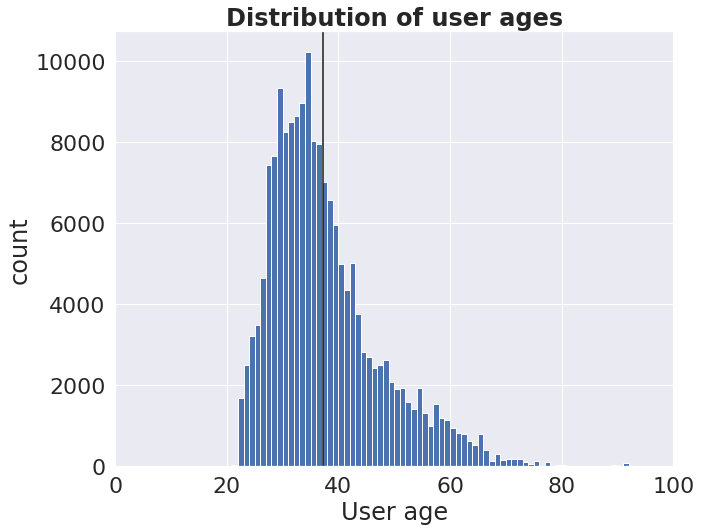

In [19]:
#distribution of user age along with average age
bike_data['age'] = bike_data['member_birth_year'].apply(lambda x: 2022-x)
bins = np.arange(0, bike_data['age'].max()+1,1)
plt.figure(figsize=(10,8))
plt.hist(x = bike_data['age'].dropna(),bins = bins)
plt.xlim(0,100)
plt.xlabel('User age')
plt.ylabel('count')
plt.title('Distribution of user ages',fontweight='bold')
plt.axvline(bike_data['age'].mean(), color='k');

I used a histogram to show the distribution of user age among the members that took trips with ford bike. The above histogram has user age on x axis and count on y axis. It also shows the average age with line in black color. The most number of members are in the age 34 years with more than 10000 members. The average age of members is 37 years. The minimum age of the members is 21 years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The column 'age' is derived from subtracting trip startdate from member birth year. The histogram is right skewed with a mean age of 37 years.

* The column 'day_of_week' is derived from start time of trip by performing datetime operations to depict the number of trips happened on each day during week and observed that most trips  happened on Thursdays and least on Saturday and Sunday. 

* The most common member birth year is 1987 followed by 1992.

* The most members are subscribers with number of trips around 16000 and the most custmers have trips below 20000.

* Most geneder of members is Male, followed my Female and others.

* The average trip duration is 726 seconds. The most number of trips have duration around 500 seconds.

* The most start stations and end stations influence the count of trips with 3500 - 4000 trips at the highest impact of each station.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There are some unusual points, operations and changes in the data:

* The maximum age of members is 144 years.
* The minimum member birth year is 1878.
* Data types for start_time and end_time should be changed to datetime datatype
* Creating new columns like time_day, day_of_week, age to clearly explore data.
* Dropped some unused variables like bike_id, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, start_station_id, end_station_id

## Bivariate Exploration



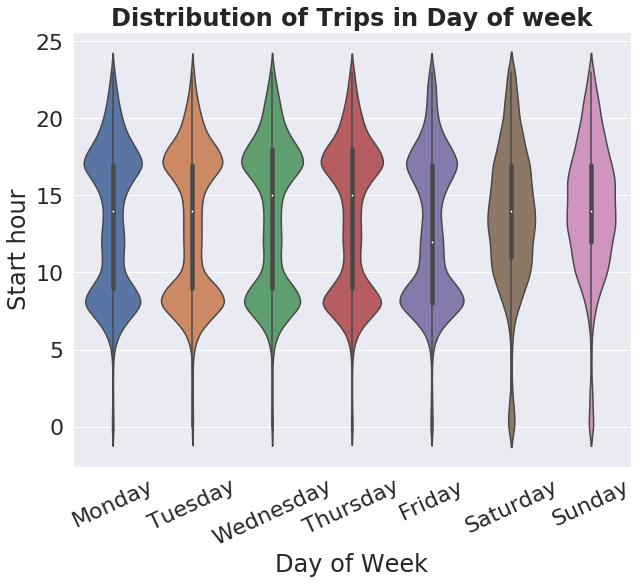

In [20]:
#Distribution of trips in day of week
plt.figure(figsize=(10,8))

day_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_week_cate = pd.api.types.CategoricalDtype(ordered=True,categories=day_week)
bike_data['day_of_week'] = bike_data['day_of_week'].astype(day_week_cate)

sb.violinplot(data = bike_data, x = 'day_of_week', y = 'start_hour')
plt.xticks(rotation = 25)
plt.xlabel('Day of Week')
plt.ylabel('Start hour')
plt.title('Distribution of Trips in Day of week',fontweight='bold');


I used a violin plot to plot a quantitative variable i.e day of week and a qualitative variable start_hour. The above violin plot has day of week as x axis a start hour on y axis and shows distribution of trips in a day of week. The violin plot shows peak during 8 th hour and 17 th hour during week days(Monday, Tuesday, Wednesday, Thursday, Friday). In the weekends(Saturday and Sunday) the peak is observed during the 13th hour.

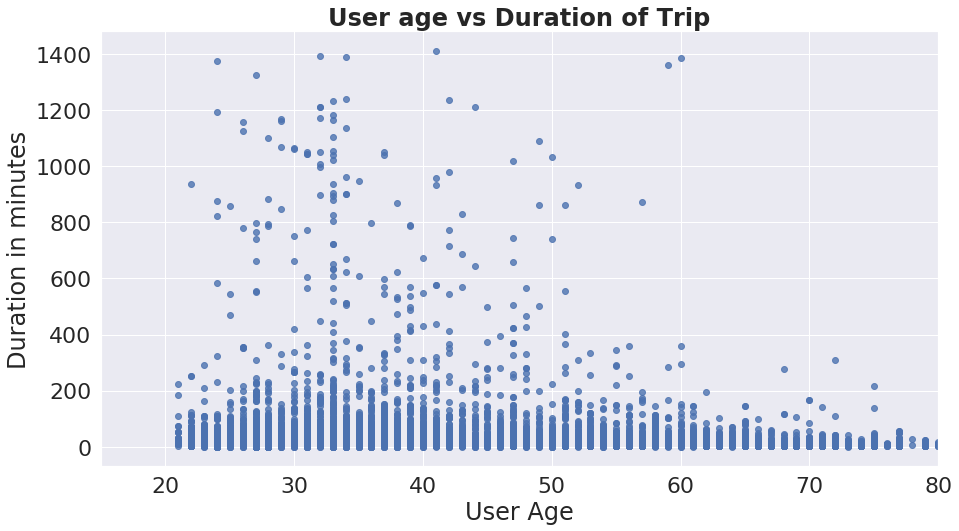

In [21]:
#distribution of user age and their trip duration
plt.figure(figsize = (15,8))
sb.regplot(x = bike_data['age'], y = bike_data['duration_sec']/60, fit_reg = False)
plt.title('User age vs Duration of Trip',fontweight='bold')
plt.xlabel('User Age')
plt.ylabel('Duration in minutes')
plt.xlim(15,80);



I have used a scatter plot to depict the relation between two quantitative variables. The scatter plot shows the distribution of how user age impact the duration of trip. The above scatter plot has user age on x axis and trip duration in minutes on y axis. Most of the trips occurred with members ages ranging from 21 to 80 years have durationof less than 200 minutes. The maximum trip duration is 1400 minutes in the members age 41 years.

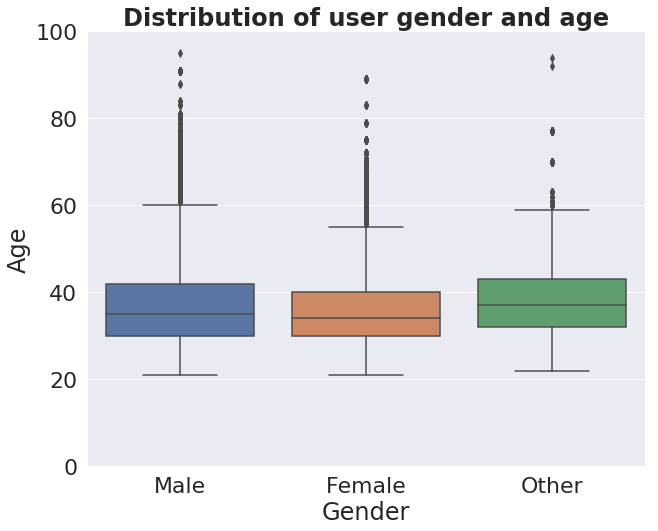

In [22]:
#Age distribution among different genders
plt.figure(figsize=(10,8))
genders = ['Male','Female','Other']
genders_cate = pd.api.types.CategoricalDtype(ordered=True,categories=genders)
sb.boxplot(data = bike_data, x = 'member_gender',
           y = 'age', order=['Male','Female','Other'])
plt.ylim(0,100);
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of user gender and age',fontweight='bold');

I have used a box plot to depict the relation between user age and gender. The above box plot has gender on x axis and age on y axis. Most of the male members have age ranging from 21 to 60 years with most age at 30 to 42 years(i.e in inter quartile range(IQR)). Most of the female members have age ranging from 21 to 55 years with most age i.e inter quartile range(IQR) at 30 to 40 years. Most of the other members have age ranging from 22 to 59 years with most age i.e, inter quartile range(IQR) at 37 to 43 years. There are also outliers depicted in the plot.

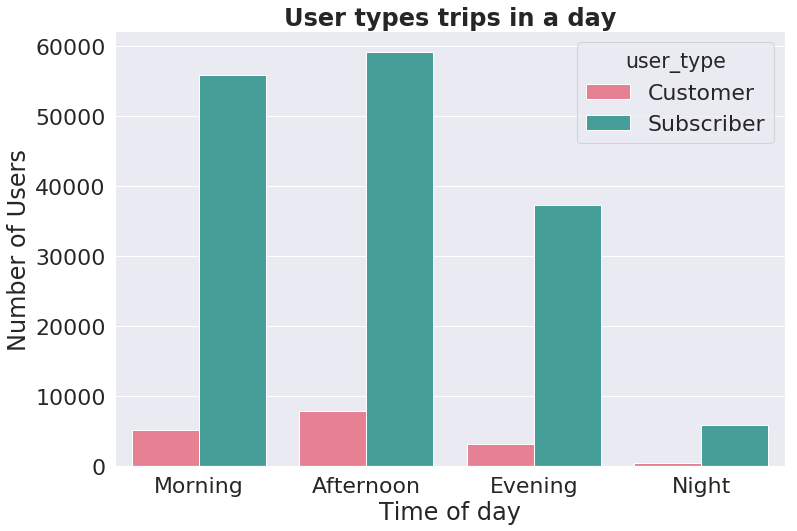

In [23]:
# distribution of user types during time of day
plt.figure(figsize=(12,8))

sb.countplot(data = bike_data, x='time_day', hue='user_type',palette = 'husl',
             order=['Morning','Afternoon','Evening','Night']);
plt.xlabel('Time of day')
plt.ylabel('Number of Users')
plt.title('User types trips in a day',fontweight='bold');

I have plotted a count plot that represents the distribuiton of number of users of each user types  and time of day. The above count plot shows time of day on x axis and number of users on y axis. The user type is represented with different colors. Most of the trips i.e, approximately 60000 trips are taken by subscribers during afternoon and around 10000 trips are taken by customers during afternoon. The least number of trips taken by both subscribers and customers are during night.

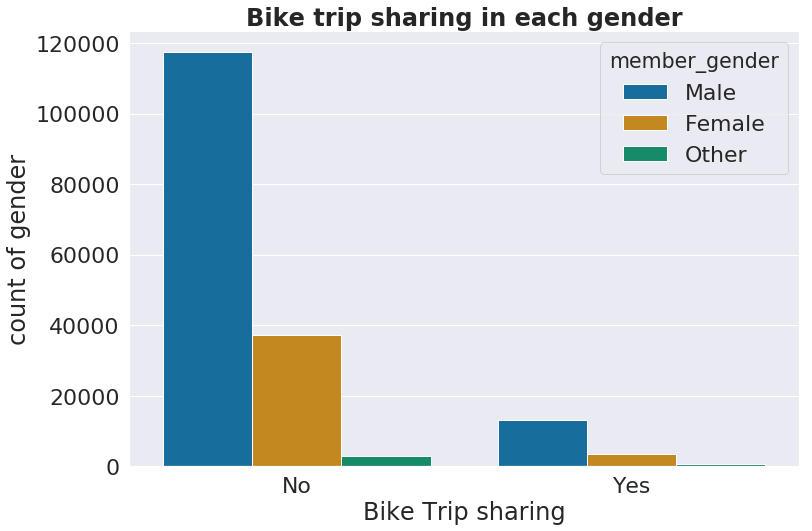

In [24]:
#distribution of ride sharing
plt.figure(figsize=(12,8))

sb.countplot(data = bike_data, x='bike_share_for_all_trip', hue='member_gender',
             palette = 'colorblind', order = ['No','Yes'], hue_order=['Male','Female','Other'])
plt.xlabel('Bike Trip sharing')
plt.ylabel('count of gender')
plt.title('Bike trip sharing in each gender',fontweight='bold');

I have used countplot to represent the bike trip sharing and the number of members of particular gender made it happened. The above countplot shows Bike sharing on x axis and the count of gender on y axis. Most number of males ie, approximately 12000 male members did not share trip. Females around 40000 members did not share their trip. Other gender in minimal amount did not share their trip. Male, Female members who shared their trip are below 20000 members. There is a minute amount of other gender members that shared their trip.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* The most trips happened during the hours 8 and 17 of the day on Monday, Tuesday, Wednesday, Thursday and Friday. And the most trips during weekend happened at 11th hour of day.
* Most of the trips occurred with members ages ranging from 21 to 80 years have duration of less than 200 minutes. The maximum trip duration is 1400 minutes in the members age 41 years.
* Most of the male members have age ranging from 21 to 60 years with most age at 30 to 42 years(i.e in inter quartile range(IQR)). Most of the female members have age ranging from 21 to 55 years with most age i.e inter quartile range(IQR) at 30 to 40 years. Most of the other members have age ranging from 22 to 59 years with most age i.e, inter quartile range(IQR) at 37 to 43 years.
* Most of the trips i.e, approximately 60000 trips are taken by subscribers during afternoon and around 10000 trips are taken by customers during afternoon. The least number of trips taken by both subscribers and customers are during night.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* There is an interesting relationship between gender and trip ride sharing. Most number of males ie, approximately 12000 male members did not share trip. Females around 40000 members did not share their trip. Other gender in minimal amount did not share their trip. Male, Female members who shared their trip are below 20000 members. There is a minute amount of other gender members that shared their trip.

## Multivariate Exploration

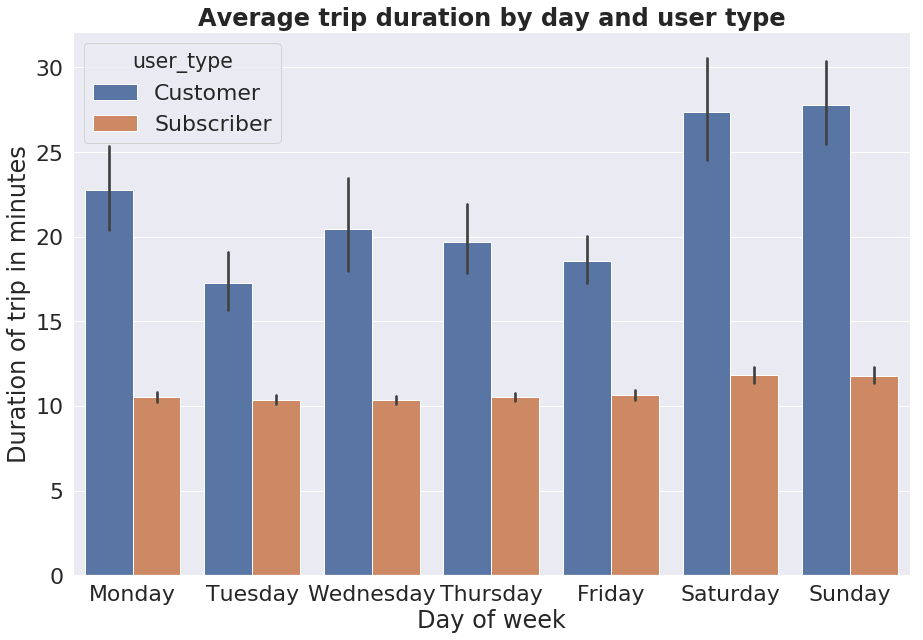

In [25]:
#day of week vs usertype vs duration
plt.figure(figsize=(15,10))
sb.barplot(data = bike_data,x='day_of_week', y=bike_data['duration_sec']/60, hue='user_type');
plt.xlabel('Day of week')
plt.ylabel('Duration of trip in minutes')
plt.title('Average trip duration by day and user type',fontweight='bold');




I have used a clustered bar plot thet uses three variables. The above plot shows the distribution of Average trip duration by day and user type. The plot has day of week on x axis, duration of trip in minutes on y axis and user type as hue. Most trip duration occurred during Saturday and Sunday at 25-30 minutes with a standard deviation little more than 30 minutes by customers. Most trip duration occurred during Saturday and Sunday at 10-11 minutes with a standard deviation little more than 10 minutes by subscribers. The least trip duration is on Tuesday by customers with 15-17 minutes trip duration. The least trip duration is on Tuesday by subscribers with 10 minutes trip duration.

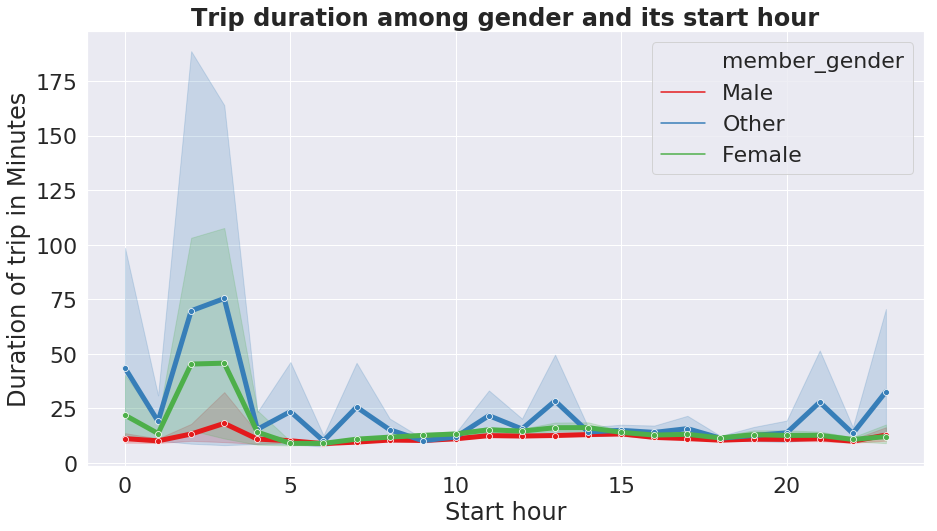

In [26]:
#Trip duration among gender and its start hour
plt.figure(figsize=(15,8))
sb.lineplot(data=bike_data, x='start_hour', y=bike_data['duration_sec']/60, 
            hue='member_gender',palette = 'Set1',linewidth=5,marker='o');
plt.xlabel('Start hour')
plt.ylabel('Duration of trip in Minutes')
plt.title('Trip duration among gender and its start hour', fontweight='bold');


I have used a line plot to represent the Trip duration among gender and its start hour using three variables. The above plot has start hour on x axis and distribution of trip in minutes on y axis and gender as hue. Each point is represented as 'o'. The plot shows different coloured lines for each gender member for their trip duration. The average trip duration points are depicted in lineplot. The coloured area of each gender represents the range of the duration of trip for each gender. The average trip duration for males is below 25 minutes at 3 rd hour, for females it is around 50 minutes at 3rd and 4th hour, for other gender the average is at 75 minutes during 4th hour.

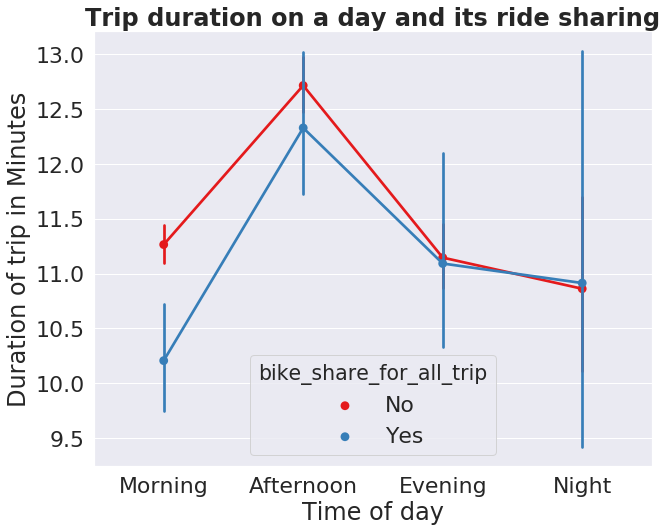

In [27]:
#Trip duration on a day and its ride sharing
plt.figure(figsize=(10,8))

sb.pointplot(data=bike_data, x='time_day', y=bike_data['duration_sec']/60, 
             hue='bike_share_for_all_trip', palette = 'Set1',linewidth=5,
             marker='o',order=['Morning','Afternoon','Evening','Night']);
plt.xlabel('Time of day')
plt.ylabel('Duration of trip in Minutes')
plt.title('Trip duration on a day and its ride sharing', fontweight='bold');



I used a point plot to depict the trip duration on a day and its ride sharing with three variables. The above plot shows time of day on x axis , durationof trip on y axis with trip sharing as hue. For the shared ride, the average trip duration in morning is around 10 minutes, during afternoon is around 12 minutes, during evening is around 11.5 minutes and during night is around 11 minutes. For the ride that is not shared, the average trip duration in the morning is around 11.5 minutes, during afternoon is around 13 minutes, during evening is around 11.5 minutes and during night is around 11 minutes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Most trip duration occurred during Saturday and Sunday at 25-30 minutes with a standard deviation little more than 30 minutes by customers. Most trip duration occurred during Saturday and Sunday at 10-11 minutes with a standard deviation little more than 10 minutes by subscribers. The least trip duration is on Tuesday by customers with 15-17 minutes trip duration. The least trip duration is on Tuesday by subscribers with 10 minutes trip duration.
* The average trip duration for males is below 25 minutes at 3 rd hour, for females it is around 50 minutes at 3rd and 4th hour, for other gender the average is at 75 minutes during 4th hour.
* For the shared ride, the average trip duration in morning is around 10 minutes, during afternoon is around 12 minutes, during evening is around 11.5 minutes and during night is around 11 minutes. for the ride that is not shared, the average trip duration in the morning is around 11.5 minutes, during afternoon is around 13 minutes, during evening is around 11.5 minutes and during night is around 11 minutes.

### Were there any interesting or surprising interactions between features?

* The other gender has the highest ride duration(~75 minutes average), followed by the female(~50 minutes average) with the male having the least trip duration(~20 minutes average).

## Conclusions
 
* Trip ride has mostly occurred multiple number of times in the top 20 start stations and ended at top 20 end stations.
* Busiest trip hours are dependent on day of week.
* Most trips are done by Male members.
* Ride sharing is mostly observed during Night.
* Other gender members have longest trip durations.
* Most of the customers does trips during Saturday and Sunday.
* Busiest time of day is Afternoon.
* Largest trip duration occurs with members of age 41 years.
* User age around 35 years tend to be more than 10000 members.
* The most popular birth year of members is 1987.
* Thursdays have highest number of trips.
* Subscribers number is very high when compared to customers.
* Male gender is most popular among members followed by Female and then Others.